In [1]:
import numpy as np
import pandas as pd
import cv2
import keras
from numpy import random
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, Activation
from keras.layers import MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
! pip install np_utils
from keras.applications import MobileNet, VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report ,confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import seaborn as sns
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=f771fa13a3b280ab0d03932c78e3c346a7cef5ea213a1e01628f98f3d9817978
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [2]:
# Directory of train, validation and test

train_folder = "/content/drive/MyDrive/Chect_data/train"
valid_folder = "/content/drive/MyDrive/Chect_data/valid"
test_folder = "/content/drive/MyDrive/Chect_data/test"

In [3]:
print("\n\n\t\tTraining Set")
print("\t  ========================\n")
train_c = []
for folder in os.listdir(train_folder):
    train_c.append(folder)
    print("\nTrain "+ folder + " Class: ", len(os.listdir(train_folder + '/' + folder)))

print("\n\n", train_c)

print("\n\n\t\tTesting Set")
print("\t  ========================\n")
test_c = []
for folder in os.listdir(test_folder):
    test_c.append(folder)
    print("\nTest "+ folder + " Class: ", len(os.listdir(test_folder + '/' + folder)))

print("\n\n", test_c)

print("\n\n\t\tValidation Set")
print("\t  ========================\n")
val_c = []
for folder in os.listdir(valid_folder):
    val_c.append(folder)
    print("\nValidation "+ folder + " Class: ", len(os.listdir(valid_folder + '/' + folder)))

print("\n\n", val_c, "\n")



		Training Set


Train normal Class:  148

Train squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  155

Train adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  195

Train large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  115


 ['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa']


		Testing Set


Test squamous.cell.carcinoma Class:  90

Test normal Class:  54

Test adenocarcinoma Class:  120

Test large.cell.carcinoma Class:  51


 ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']


		Validation Set


Validation normal Class:  13

Validation squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa Class:  15

Validation large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa Class:  21

Validation adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib Class:  23


 ['normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa', 'large.cell.carcinoma_left.hilum_T2_N2_M0

In [4]:
input_shape = (224,224,3)
num_class = 4

train_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False
)
val_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
)
test_datagen = ImageDataGenerator(
    dtype='float32',
    preprocessing_function=preprocess_input,
)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)
test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    shuffle = False,
)
validation_generator = val_datagen.flow_from_directory(
    valid_folder,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)

Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [5]:
# Get list of class weights
class_weights_list = class_weight.compute_class_weight(
           class_weight='balanced',
            classes=np.unique(train_generator.classes),
            y=train_generator.classes)
# Get class labels
class_labels=np.unique(train_generator.classes)

# Put weights in dict with class label
class_weights = {}
for class_i in range(len(class_labels)):
     class_weights[class_labels[class_i]] = class_weights_list[class_i]

# Check
class_weights

{0: 0.7858974358974359,
 1: 1.3326086956521739,
 2: 1.035472972972973,
 3: 0.9887096774193549}

In [6]:
# Modelling
# 1. VGG16
# 2. AlexNet
# 3. InceptionV3


In [ ]:
#ALEXNET

In [7]:
modelVGG16 = VGG16(weights = 'imagenet',
                     include_top = False,
                     input_shape = input_shape)

for layer in modelVGG16.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [8]:
model = Sequential([
    modelVGG16,
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(.3),
    Flatten(),
    Dense(1024, activation = 'relu'),
    Dropout(.3),
    Dense(512, activation = 'relu'),
    Dropout(.3),
    Dense(256, activation = 'relu'),
    Dropout(.3),
    Dense(num_class, activation = 'softmax')
])


print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 512)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 3, 512)         0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1024)              4

In [9]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
opt1 = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [10]:
epochs = 50

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    class_weight=class_weights,
    verbose=1
)
test = test_generator
score = model.evaluate(test, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
20/20 [==============================] - 247s 11s/step - loss: 2.1772 - accuracy: 0.3980 - val_loss: 0.9834 - val_accuracy: 0.5833
Epoch 2/50
20/20 [==============================] - 13s 654ms/step - loss: 1.2518 - accuracy: 0.5041 - val_loss: 0.9869 - val_accuracy: 0.5417
Epoch 3/50
20/20 [==============================] - 13s 659ms/step - loss: 1.0595 - accuracy: 0.5269 - val_loss: 0.8747 - val_accuracy: 0.6250
Epoch 4/50
20/20 [==============================] - 13s 668ms/step - loss: 0.8782 - accuracy: 0.6199 - val_loss: 0.9365 - val_accuracy: 0.5139
Epoch 5/50
20/20 [==============================] - 13s 647ms/step - loss: 0.7925 - accuracy: 0.6656 - val_loss: 0.9930 - val_accuracy: 0.7222
Epoch 6/50
20/20 [==============================] - 13s 635ms/step - loss: 0.7668 - accuracy: 0.6754 - val_loss: 0.9300 - val_accuracy: 0.5972
Epoch 7/50
20/20 [==============================] - 19s 945ms/step - loss: 0.7164 - accuracy: 0.6982 - val_loss: 0.6114 - val_accuracy: 0.7222


In [13]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)

predicted_probabilities = model.predict(test_generator, steps=num_test_samples)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

true_labels = test_generator.classes

report = classification_report(true_labels, predicted_labels)

print(report)

10/10 [==============================] - 3s 243ms/step
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       120
           1       0.85      0.98      0.91        51
           2       1.00      0.98      0.99        54
           3       0.94      0.68      0.79        90

    accuracy                           0.88       315
   macro avg       0.90      0.89      0.89       315
weighted avg       0.89      0.88      0.87       315





Confusion Matrix:
 [[112   4   0   4]
 [  1  50   0   0]
 [  0   1  53   0]
 [ 25   4   0  61]]


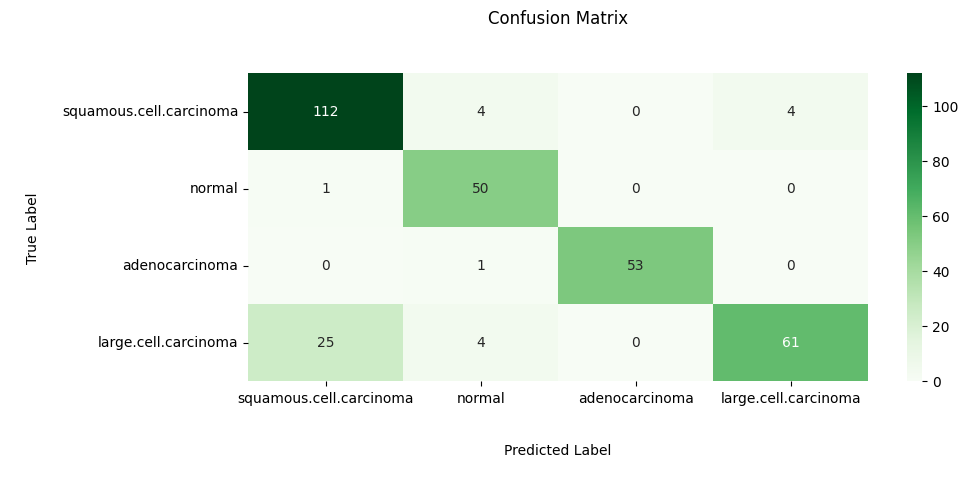

In [14]:
cm = confusion_matrix(true_labels, predicted_labels)
print("\n\nConfusion Matrix:\n", cm)

plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels = test_c, yticklabels = test_c)
plt.xlabel('\n\nPredicted Label\n')
plt.ylabel('\nTrue Label\n')
plt.title('Confusion Matrix\n\n')
plt.show()

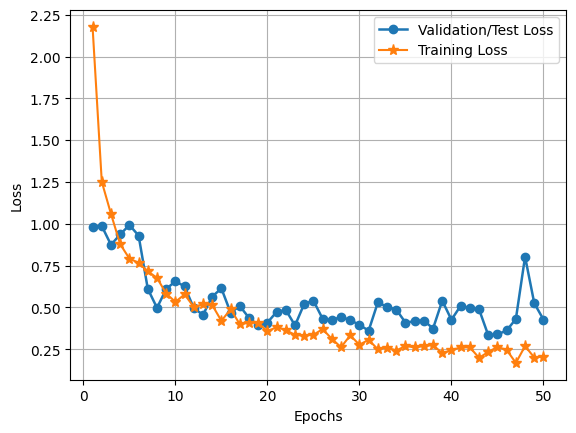

In [15]:
#Plotting the loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.0)
plt.setp(line2, linewidth = 1.5, marker = '*', markersize = 8.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

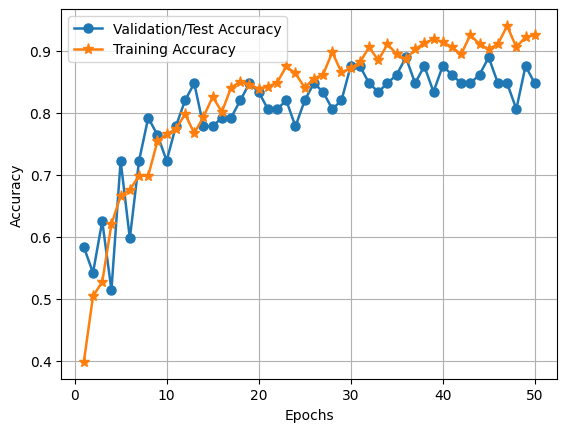

In [16]:
#Plotting the accuracy charts
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.5)
plt.setp(line2, linewidth = 1.8, marker = '*', markersize = 8.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# ALEXNET

In [24]:
# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))

# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 activation_9 (Activation)   (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_9 (Bat  (None, 27, 27, 96)        384       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_10 (Activation)  (None, 17, 17, 256)      

In [25]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
opt1 = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [27]:
epochs = 50

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    class_weight=class_weights,
    verbose=1
)
test = test_generator
score = model.evaluate(test, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
20/20 [==============================] - 11s 533ms/step - loss: 1.1583 - accuracy: 0.5367 - val_loss: 9.2687 - val_accuracy: 0.2778
Epoch 2/50
20/20 [==============================] - 12s 605ms/step - loss: 1.0622 - accuracy: 0.5595 - val_loss: 4.4626 - val_accuracy: 0.2917
Epoch 3/50
20/20 [==============================] - 12s 603ms/step - loss: 1.0677 - accuracy: 0.5661 - val_loss: 3.0582 - val_accuracy: 0.4583
Epoch 4/50
20/20 [==============================] - 12s 604ms/step - loss: 1.1732 - accuracy: 0.4910 - val_loss: 1.9883 - val_accuracy: 0.5000
Epoch 5/50
20/20 [==============================] - 16s 764ms/step - loss: 1.0270 - accuracy: 0.5416 - val_loss: 1.2137 - val_accuracy: 0.5694
Epoch 6/50
20/20 [==============================] - 11s 555ms/step - loss: 1.0483 - accuracy: 0.5595 - val_loss: 1.3529 - val_accuracy: 0.5833
Epoch 7/50
20/20 [==============================] - 13s 615ms/step - loss: 0.9744 - accuracy: 0.5759 - val_loss: 1.0302 - val_accuracy: 0.5139

In [28]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)

predicted_probabilities = model.predict(test_generator, steps=num_test_samples)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

true_labels = test_generator.classes

report = classification_report(true_labels, predicted_labels)

print(report)

10/10 [==============================] - 3s 308ms/step
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       120
           1       0.67      0.27      0.39        51
           2       1.00      1.00      1.00        54
           3       0.58      0.58      0.58        90

    accuracy                           0.68       315
   macro avg       0.72      0.66      0.66       315
weighted avg       0.68      0.68      0.66       315





Confusion Matrix:
 [[93  6  0 21]
 [20 14  0 17]
 [ 0  0 54  0]
 [37  1  0 52]]


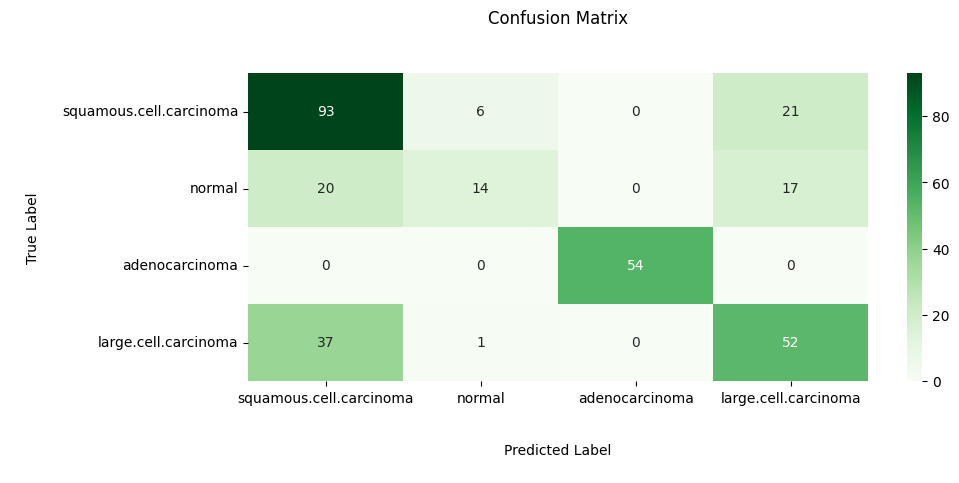

In [29]:
cm = confusion_matrix(true_labels, predicted_labels)
print("\n\nConfusion Matrix:\n", cm)

plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels = test_c, yticklabels = test_c)
plt.xlabel('\n\nPredicted Label\n')
plt.ylabel('\nTrue Label\n')
plt.title('Confusion Matrix\n\n')
plt.show()

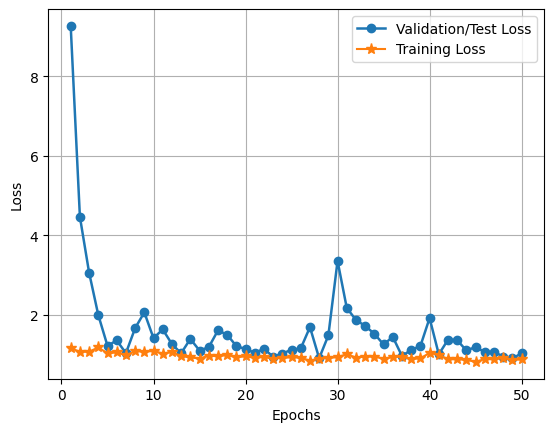

In [30]:
#Plotting the loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.0)
plt.setp(line2, linewidth = 1.5, marker = '*', markersize = 8.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

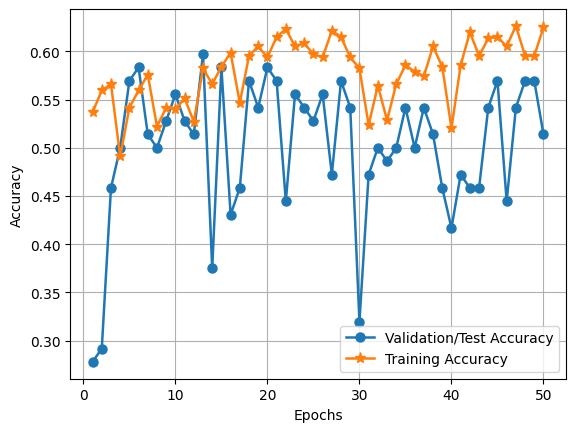

In [32]:
#Plotting the accuracy charts
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.5)
plt.setp(line2, linewidth = 1.8, marker = '*', markersize = 8.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [33]:
inception_v3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 [==============================] - 3s 0us/step


In [34]:
for layer in inception_v3.layers[: -15]:
    layer.trainable = False

In [35]:
x = inception_v3.output
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)

output = Dense(units=4, activation='softmax')(x)
model = Model(inception_v3.input, output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_17 (Ba  (None, 111, 111, 32)         96        ['conv2d_11[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_18 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_17[0

In [36]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)
opt1 = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [42]:
epochs = 50

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    class_weight=class_weights,
    verbose=1
)
test = test_generator
score = model.evaluate(test, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/50
20/20 [==============================] - 14s 699ms/step - loss: 1.3257 - accuracy: 0.4046 - val_loss: 1.3551 - val_accuracy: 0.3611
Epoch 2/50
20/20 [==============================] - 12s 621ms/step - loss: 1.2884 - accuracy: 0.4144 - val_loss: 1.2518 - val_accuracy: 0.3889
Epoch 3/50
20/20 [==============================] - 13s 627ms/step - loss: 1.2757 - accuracy: 0.4323 - val_loss: 1.3080 - val_accuracy: 0.4028
Epoch 4/50
20/20 [==============================] - 13s 629ms/step - loss: 1.3277 - accuracy: 0.4274 - val_loss: 1.2834 - val_accuracy: 0.4306
Epoch 5/50
20/20 [==============================] - 12s 624ms/step - loss: 1.2922 - accuracy: 0.4209 - val_loss: 1.3267 - val_accuracy: 0.4028
Epoch 6/50
20/20 [==============================] - 11s 594ms/step - loss: 1.3347 - accuracy: 0.4062 - val_loss: 1.3201 - val_accuracy: 0.4028
Epoch 7/50
20/20 [==============================] - 11s 549ms/step - loss: 1.3384 - accuracy: 0.4405 - val_loss: 1.2207 - val_accuracy: 0.4444

In [43]:
num_test_samples = len(test_generator)
num_classes = len(test_generator.class_indices)

predicted_probabilities = model.predict(test_generator, steps=num_test_samples)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

true_labels = test_generator.classes

report = classification_report(true_labels, predicted_labels)

print(report)

10/10 [==============================] - 2s 231ms/step
              precision    recall  f1-score   support

           0       0.45      0.97      0.62       120
           1       0.67      0.04      0.07        51
           2       1.00      0.56      0.71        54
           3       0.52      0.13      0.21        90

    accuracy                           0.51       315
   macro avg       0.66      0.43      0.40       315
weighted avg       0.60      0.51      0.43       315





Confusion Matrix:
 [[117   1   0   2]
 [ 45   2   0   4]
 [ 19   0  30   5]
 [ 78   0   0  12]]


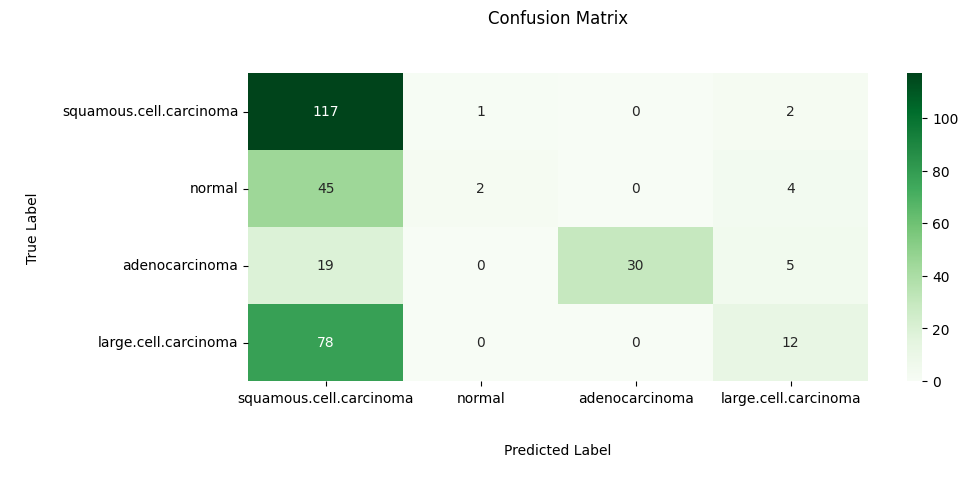

In [44]:
cm = confusion_matrix(true_labels, predicted_labels)
print("\n\nConfusion Matrix:\n", cm)

plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', xticklabels = test_c, yticklabels = test_c)
plt.xlabel('\n\nPredicted Label\n')
plt.ylabel('\nTrue Label\n')
plt.title('Confusion Matrix\n\n')
plt.show()

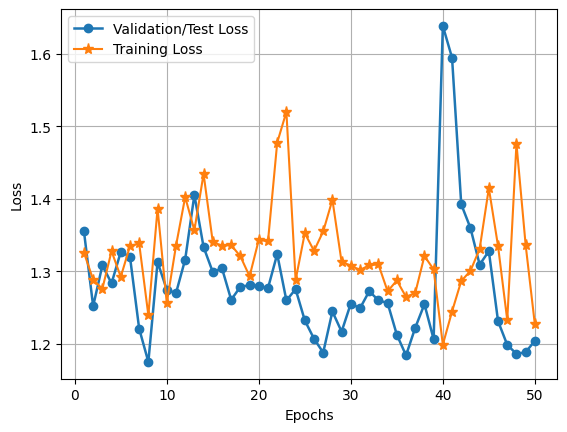

In [45]:
#Plotting the loss charts

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.0)
plt.setp(line2, linewidth = 1.5, marker = '*', markersize = 8.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

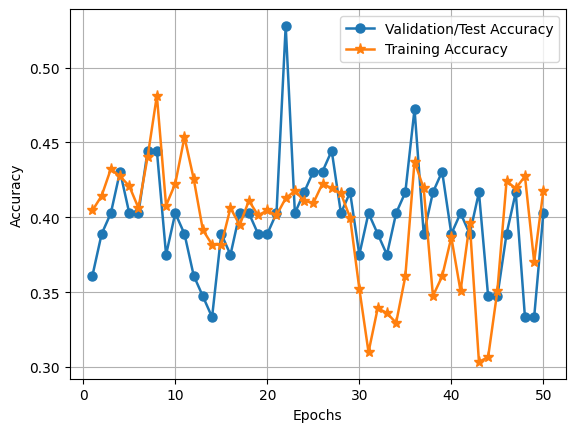

In [46]:
#Plotting the accuracy charts
history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training Accuracy')

plt.setp(line1, linewidth = 1.8, marker = 'o', markersize = 6.5)
plt.setp(line2, linewidth = 1.8, marker = '*', markersize = 8.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()